### importing libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

#### importing dataset

In [2]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

0

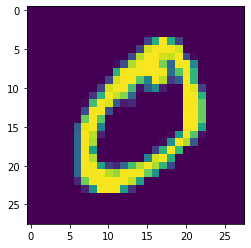

In [4]:
plt.imshow(train_img[1])
train_lab[1]

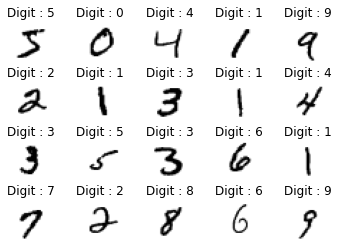

In [5]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

Detials of train images

In [6]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


compiling the sequential model


In [11]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
model.fit(train_img,train_lab,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1854 - accuracy: 0.9435
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0796 - accuracy: 0.9751
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0571 - accuracy: 0.9818
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0349 - accuracy: 0.9888
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0262 - accuracy: 0.9921
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0179 - accuracy: 0.9948
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step -

1875/1875 [==============================] - 9s 5ms/step - loss: 0.0093 - accuracy: 0.9987
Epoch 80/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0097 - accuracy: 0.9990
Epoch 81/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0118 - accuracy: 0.9987
Epoch 82/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0105 - accuracy: 0.9989
Epoch 83/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0066 - accuracy: 0.9993
Epoch 84/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0061 - accuracy: 0.9992
Epoch 85/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0088 - accuracy: 0.9991
Epoch 86/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0099 - accuracy: 0.9990
Epoch 87/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0082 - accuracy: 0.9991
Epoch 88/100
1875/1875 [==============================] - 9s 5ms/step - loss:

In [13]:
model.save('finalproject.h5')

In [14]:
model.load_weights('finalproject.h5')
#compiling the model
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 1s - loss: 0.4881 - accuracy: 0.9827 - 826ms/epoch - 3ms/step
Test Loss 0.4881443381309509
Test Accuracy 0.982699990272522


Predicted Value:  0
Successful prediction


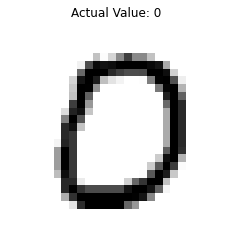

In [18]:
plt.imshow(test_img[10],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[10]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[10]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

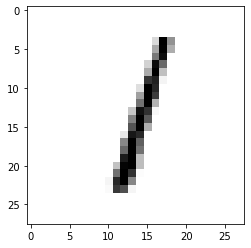

In [20]:
from IPython.display import Image
Image(test_img[2],width=250,height=250)
plt.imshow(test_img[2],cmap='gray_r')

### make a prediction for a new image.

In [21]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [28]:
filename = 'four.jpg'
img = load_image(filename)
label = int(input('Actual Numbar = '))
predict = model.predict(img)
classify = np.argmax(predict)
print('Predicted value : ', classify)

if(label==(np.argmax(predict))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')

cv2.imread(filename)
print(filename)

Actual Numbar = 5
Predicted value :  7
Unsuccessful prediction
four.jpg
